The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csvView in a new window

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

Steps to follow:

1) EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

2) Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

3) Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

4) Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
df_cars = pd.read_csv('cars-dataset.csv')

In [64]:
print ('**********Describe**********************')
print (df_cars.describe(include = 'all').transpose())

print ('**********Info**********************')
print (df_cars.info())

print ('**********Shape**********************')

print (df_cars.shape)

print ('**********Is NA Count**********************')
print (df_cars.isna().sum())


print ('**********Is Null**********************')

print (df_cars.isnull().any(axis=0))

**********Describe**********************
         count unique         top freq     mean      std   min      25%  \
car name   398    305  ford pinto    6      NaN      NaN   NaN      NaN   
cyl        398    NaN         NaN  NaN  5.45477    1.701     3        4   
disp       398    NaN         NaN  NaN  193.426   104.27    68   104.25   
hp         398     94         150   22      NaN      NaN   NaN      NaN   
wt         398    NaN         NaN  NaN  2970.42  846.842  1613  2223.75   
acc        398    NaN         NaN  NaN  15.5681  2.75769     8   13.825   
yr         398    NaN         NaN  NaN  76.0101  3.69763    70       73   
mpg        398    NaN         NaN  NaN  23.5146  7.81598     9     17.5   

             50%     75%   max  
car name     NaN     NaN   NaN  
cyl            4       8     8  
disp       148.5     262   455  
hp           NaN     NaN   NaN  
wt        2803.5    3608  5140  
acc         15.5  17.175  24.8  
yr            76      79    82  
mpg           23   

In [65]:
df_cars['hp'] = pd.to_numeric(df_cars['hp'], errors='coerce')

In [66]:
print ('**********Is NA Count**********************')
print (df_cars.isna().sum())

**********Is NA Count**********************
car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [67]:
# Since there are only 6 rows, we can either remove them or fill them with appropriate values based on a linear relationship with another attribute (with weight)
df_cars_na = df_cars.dropna(axis=0)
print ('**********Is NA Count**********************')
print (df_cars_na.isna().sum())

**********Is NA Count**********************
car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


 ### (2) Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

In [68]:
#sns.pairplot(df_cars)

In [69]:
#sns.pairplot(df_cars, hue = 'mpg')

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


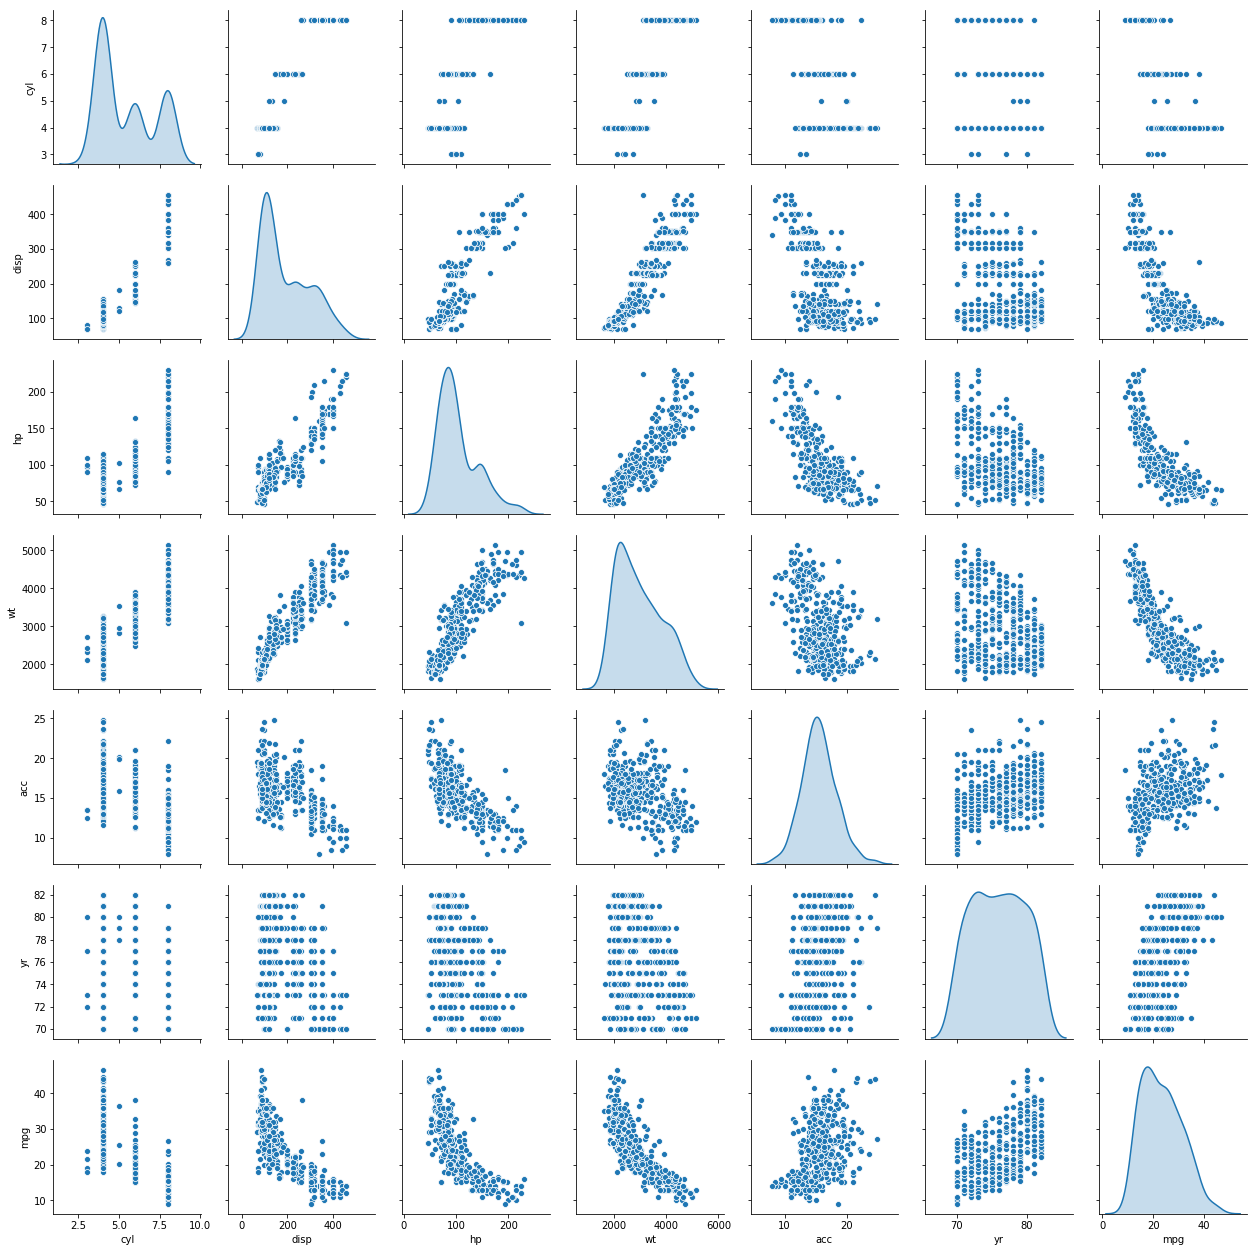

In [70]:
sns.pairplot(df_cars, diag_kind = 'kde')

###  (A) Going through diagnal charts, there seem to be three Gausian Curves (clusters) with cylinders, with displacement - could be 2 to 3 distributions, hp - looks 2 distributions, other parameters provide 1. However, other clusters (or distributions) could be hidden behind.  
### (B) Relationship between variables - several of these are elongated distributions, and difficult to identify good clusters using kmeans. 

3) Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

### We will use Kmeans and identify the optimum clusters

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
16.0    13
19.0    12
24.0    11
22.0    10
25.0    10
28.0    10
23.0     9
27.0     9
20.0     9
29.0     8
31.0     7
17.0     7
30.0     7
21.0     7
36.0     6
12.0     6
32.0     6
15.5     5
17.5     5
38.0     4
11.0     4
20.2     4
33.0     3
18.5     3
16.5     3
        ..
39.4     1
43.1     1
24.2     1
32.7     1
44.6     1
16.9     1
20.8     1
16.2     1
34.4     1
43.4     1
39.1     1
32.1     1
37.2     1
38.1     1
30.9     1
37.3     1
34.7     1
22.3     1
27.5     1
34.5     1
41.5     1
35.7     1
34.2     1
23.5     1
39.0     1
30.7     1
31.9     1
44.0     1
28.8     1
27.4     1
Name: mpg, Length: 127, dtype: int64


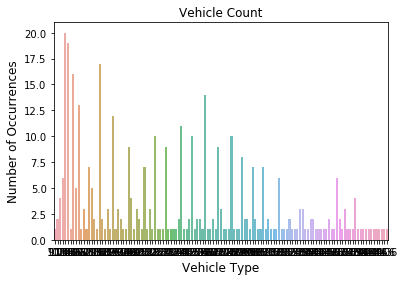

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

mpg_count = df_cars_na['mpg'].value_counts()

print (mpg_count)

sns.barplot(mpg_count.index, mpg_count.values, alpha=0.8)

plt.title('Vehicle Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle Type', fontsize=12)
plt.show()


In [72]:
df_attr = df_cars_na.drop('mpg', axis=1)
df_attr.head().T

,0,1,2,3,4
car name,chevrolet chevelle malibu,buick skylark 320,plymouth satellite,amc rebel sst,ford torino
cyl,8,8,8,8,8
disp,307,350,318,304,302
hp,130,165,150,150,140
wt,3504,3693,3436,3433,3449
acc,12,11.5,11,12,10.5
yr,70,70,70,70,70


In [106]:
#Encode all categorical variables to numerical

# import library
from sklearn import preprocessing

# Create Label Encoder instance
le = preprocessing.LabelEncoder()
df_cars_na['car name'] = le.fit_transform(df_cars_na['car name'])
df_attr['car name'] = le.fit_transform(df_attr['car name'])


C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
df_attr.head()

,car name,cyl,disp,hp,wt,acc,yr
0,48,8,307.0,130.0,3504,12.0,70
1,35,8,350.0,165.0,3693,11.5,70
2,229,8,318.0,150.0,3436,11.0,70
3,13,8,304.0,150.0,3433,12.0,70
4,159,8,302.0,140.0,3449,10.5,70


In [75]:
# convert all attributes to z scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_attr)
df_attr_z = scaler.transform(df_attr)
df_attr_z = pd.DataFrame(df_attr_z)
 
colNames = df_attr.columns
df_attr_z.columns = colNames
df_attr_z.head()

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


,car name,cyl,disp,hp,wt,acc,yr
0,-1.113311,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.260181,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,0.931568,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-1.508729,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,0.140731,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


In [76]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)

In [77]:
# Creating an array distortion
distortion = []
distortion

[]

In [78]:
#Initial a list to track SSE for KMeans with different K
from sklearn.cluster import KMeans
#df_attr_z = df_attr
x_z = df_attr_z.copy()

sse_df = pd.DataFrame(columns=['K', 'SSE'])

for i in range (1,20):
    #Initialize KMeans
    km = KMeans(n_clusters=i)
    km.fit(df_attr_z)
    df_attr_z['k_'+str(i)] = km.predict(df_attr_z)
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]
    distortion.append (km.inertia_)

distortion

[2744.0,
 1426.6858414887483,
 1158.0194156515176,
 998.9711500424887,
 920.510793183068,
 848.8294422209365,
 778.5310772657324,
 714.7087548701212,
 673.5279849948117,
 643.8608958829004,
 608.2389377359648,
 578.7895224873498,
 553.4284895063788,
 525.3162320743307,
 503.82317253635097,
 484.31869212842156,
 466.4634215073946,
 451.7446779156768,
 438.6339134705653]

In [83]:
sse_df

,K,SSE
0,1.0,2744.000000
1,2.0,1426.685841
2,3.0,1158.019416
3,4.0,998.971150
4,5.0,920.510793
5,6.0,848.829442
6,7.0,778.531077
7,8.0,714.708755
8,9.0,673.527985
9,10.0,643.860896


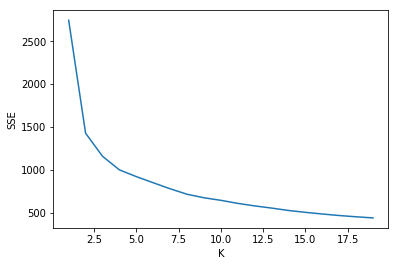

In [79]:
sns.lineplot(x='K', y='SSE', data=sse_df)

#### Based on the elbow chart, cluster count of 2 to 4 looks fine. After 4 clusters, increasing the count further does not bring much value. We can go with 3 clusters

### Using optimal value of K (i.e. 3) - Clustering the data

In [85]:
km = KMeans(n_clusters=3)
km.fit(x_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [86]:
colNames = x_z.columns
print (colNames)
centroid = pd.DataFrame(km.cluster_centers_)

centroid

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')


,0,1,2,3,4,5,6
0,-0.361294,0.378657,0.265093,-0.063406,0.303129,0.315114,0.072054
1,-0.314625,1.483947,1.485912,1.499293,1.387382,-1.065971,-0.666826
2,0.314537,-0.869797,-0.818130,-0.672279,-0.789633,0.352938,0.278697


In [87]:
centroid.columns = colNames
centroid

,car name,cyl,disp,hp,wt,acc,yr
0,-0.361294,0.378657,0.265093,-0.063406,0.303129,0.315114,0.072054
1,-0.314625,1.483947,1.485912,1.499293,1.387382,-1.065971,-0.666826
2,0.314537,-0.869797,-0.818130,-0.672279,-0.789633,0.352938,0.278697


In [88]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,

In [98]:
df_cars_na['ClusterLabel'] = km.labels_
df_cars_na.head().T

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,0,1,2,3,4
car name,chevrolet chevelle malibu,buick skylark 320,plymouth satellite,amc rebel sst,ford torino
cyl,8,8,8,8,8
disp,307,350,318,304,302
hp,130,165,150,150,140
wt,3504,3693,3436,3433,3449
acc,12,11.5,11,12,10.5
yr,70,70,70,70,70
mpg,18,15,18,16,17
ClusterLabel,1,1,1,1,1


### Separating the clusters

In [100]:
pd.value_counts(df_cars_na['ClusterLabel'])

2    203
1     95
0     94
Name: ClusterLabel, dtype: int64

In [107]:
df_label0 = df_cars_na[df_cars_na['ClusterLabel'] == 0]
print (df_label0.shape)
df_label1 = df_cars_na[df_cars_na['ClusterLabel'] == 1]
df_label2 = df_cars_na[df_cars_na['ClusterLabel'] == 2]
print (df_label1.shape)
print (df_label2.shape)


(94, 9)
(95, 9)
(203, 9)


#### 4) Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Cluster Label 0 - Regression and Coefficients

In [126]:
X_label = df_label0.drop(['mpg', 'ClusterLabel'], axis=1)
y_label = df_label0['mpg']

#print (X_label0.shape)
#print (X_label0.head())

X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(X_label, y_label, train_size=0.7, random_state=0)

print ('X train', X_label_train.shape)
print ('X test', X_label_test.shape)
print ('y train', y_label_train.shape)
print ('y test', y_label_test.shape)

#print (y_label0.value_counts())
#print (y_label0_train.value_counts())
#print (y_label0_test.value_counts())

lr = LinearRegression()  
lr.fit(X_label_train, y_label_train)

colName = X_label.columns.array

coeff_label0 = pd.DataFrame(lr.coef_, colName)
print (coeff_label0)

X train (65, 7)
X test (29, 7)
y train (65,)
y test (29,)
                 0
car name  0.008129
cyl      -0.808090
disp      0.034197
hp       -0.032514
wt       -0.005971
acc      -0.425151
yr        0.846791


C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Cluster Label 1 - Regression and Coefficients

In [125]:


X_label = df_label1.drop(['mpg', 'ClusterLabel'], axis=1)
y_label = df_label1['mpg']

#print (X_label0.shape)
#print (X_label0.head())

X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(X_label, y_label, train_size=0.7, random_state=0)

print ('X train', X_label_train.shape)
print ('X test', X_label_test.shape)
print ('y train', y_label_train.shape)
print ('y test', y_label_test.shape)

#print (y_label0.value_counts())
#print (y_label0_train.value_counts())
#print (y_label0_test.value_counts())

lr = LinearRegression()  
lr.fit(X_label_train, y_label_train)

colName = X_label.columns.array

coeff_label1 = pd.DataFrame(lr.coef_, colName)
print (coeff_label1)

X train (72, 7)
X test (23, 7)
y train (72,)
y test (23,)
                     0
car name -1.311026e-04
cyl      -8.630249e-17
disp     -5.808087e-03
hp       -1.854546e-02
wt       -1.046729e-03
acc      -4.857709e-01
yr        4.116230e-01


C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Cluster Label 2 - Regression and Coefficients

In [127]:
X_label = df_label2.drop(['mpg', 'ClusterLabel'], axis=1)
y_label = df_label2['mpg']

#print (X_label0.shape)
#print (X_label0.head())

X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(X_label, y_label, train_size=0.7, random_state=0)

print ('X train', X_label_train.shape)
print ('X test', X_label_test.shape)
print ('y train', y_label_train.shape)
print ('y test', y_label_test.shape)

#print (y_label0.value_counts())
#print (y_label0_train.value_counts())
#print (y_label0_test.value_counts())

lr = LinearRegression()  
lr.fit(X_label_train, y_label_train)

colName = X_label.columns.array

coeff_label0 = pd.DataFrame(lr.coef_, colName)
print (coeff_label0)

X train (142, 7)
X test (61, 7)
y train (142,)
y test (61,)
                 0
car name -0.000399
cyl       4.518298
disp     -0.060502
hp       -0.076009
wt       -0.005073
acc      -0.022275
yr        0.934721


C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
